Here we integrate the partition mean fields using the Ott-Antonsen ansatz for phase equations

$$
     \dot\vartheta_n = 1.0 + \sigma\nu_n + \frac{\lambda}{\mu_n} \sum_{k} A_{nk}\sin(\psi_k-\vartheta_n-\alpha)
$$
in the followers, and

$$
    \dot \psi_k = \beta\left(1.0 + \frac{\lambda}{\mu_k}\sum_n A_{kn}\sin(\vartheta_n-\psi_k-\alpha)\right) + \sqrt{2q\beta}\eta(t)
$$
in the influencers.

We also integrate the deterministic equations obtained from averaging of fast influencer dynamics using the continued fraction solution of the stochastic Adler equation.

In [1]:
# import necessary numerics and graphics modules
from pylab import *
print('numpy version : ',np.__version__)

numpy version :  1.19.1


In [2]:
#set up system parameters

# weights for partitions of followers of influencers A and B
wA0 = 0.5
wA2 = 0.5
wB1 = 0.5
wB2 = 0.5

# frequencies in the follower groups 0, 1 and 2
om0 = 1.0 
om1 = 1.0
om2 = 1.0

alpha = -0.1

sgm0 = 0.01

lam=0.5

# coupling intensity parameters of influencers A and B
betaA = 16.0
betaB = 26.0

# (effective) noise strengths in the influencers
qA = 1.0
qB = 1.0
DA = qA*betaA
DB = qB*betaB

In [3]:
# random initial follower partition mean fields
Z0 = 0.5*exp(1j*np.random.random()*2*pi)
Z1 = 0.5*exp(1j*np.random.random()*2*pi)
Z2 = 0.5*exp(1j*np.random.random()*2*pi)

# random initial influencer phases
psiA = np.random.random()*2*pi
psiB = np.random.random()*2*pi

$$
    \dot Z = iZ\left(\bar{f}Z + (h+i\sigma) + fZ^{-1}\right) = \left(\dot\Theta -i\frac{\dot R}{R} \right) i Re^{i\Theta} = \left(\bar{f}Re^{i\Theta} + (h+i\sigma) + fR^{-1}e^{-i\Theta}\right) iRe^{i\Theta}
$$

$$
    \left(\bar{f}Re^{i\Theta} + (h+i\sigma) + fR^{-1}e^{-i\Theta}\right)
    = \left(\bar{f}Re^{i\Theta} + fR e^{-i\Theta} + (h+i\sigma) + fR^{-1}e^{-i\Theta}-f Re^{-i\Theta}\right)
    = \left(2R\textrm{Re}\left[fe^{-i\Theta}\right] +(h+i\sigma)+ \left(R^{-1}-R\right)fe^{-i\Theta}\right)
    = 2R\textrm{Re}\left[fe^{-i\Theta}\right] +(h+i\sigma)+ \frac{1-R^2}{R}\left(\textrm{Re}\left[fe^{-i\Theta}\right] + i \textrm{Im}\left[fe^{-i\Theta}\right]\right)
$$

$$
    \left(\dot\Theta -i\frac{\dot R}{R} \right)= \left(\frac{1+R^2}{R}\textrm{Re}\left[fe^{-i\Theta}\right] + h\right) 
    + i \frac{1}{R}\left(R\sigma + (1-R^2)\textrm{Im}\left[fe^{-i\Theta}\right]\right)
$$

$\Theta$ has singularity at $R=0$ but the ODEs for $\Theta$ and $R$ are integrated more accurately near $R=1$ than the ODE for $Z$.

In [4]:
def WSOA_EulerStep(Z,f,h,sgm,dt) :
    """Integrate an Euler step for Z on the unit disc subject to ODE
    \dot Z = iZ\left(\bar{f}Z + (h+i\sigma) + fZ^{-1}\right)
    
    If R<0.95 use the complex ODE, otherwise integrate ODEs for amplitude
    and phase of Z
    """
    R = np.abs(Z)
    if R<0.95 :
        dZ = 1j*(f.conj()*Z**2+(h+1j*sgm)*Z+f)
        Z+=dZ*dt
    else :
        Th = np.angle(Z)
        H = f*exp(-1j*Th)
    
        dTh = ((1+R*R)/R*H.real+h)
        dR  = -(H.imag*(1-R*R)+sgm*R)
        R+=dR*dt
        Th = mod(Th+dTh*dt,2*pi)
        Z = R*exp(1j*Th)
        
    return Z

In [5]:
# run simulation of follower mean fields and stochastic influencer phases
# for a time dt*steps

dt = 0.001
steps = 1000000

# record of follower partition mean fields
Z0hist = np.zeros(steps,dtype=complex)
Z1hist = np.zeros(steps,dtype=complex)
Z2hist = np.zeros(steps,dtype=complex)

pctlast=-1
for t in range(steps) :
    
    # progress counter
    pct = (t*100//steps)
    if pct!=pctlast :
        print(pct,end=' ')
        pctlast=pct

    
    Z0hist[t]=Z0
    Z1hist[t]=Z1
    Z2hist[t]=Z2
    
    # forces on the follower partions
    f0 = lam/(2*1j)*exp(1j*(psiA-alpha))
    f1 = lam/(2*1j)*exp(1j*(psiB-alpha))
    f2 = lam/(2*1j)*exp(-1j*alpha)*(exp(1j*psiA)+exp(1j*psiB))/2
    
    # deterministic part of force on influencers
    dpsiA = betaA*(1.0+lam*((wA0*Z0+wA2*Z2)*exp(-1j*alpha)*exp(-1j*psiA)).imag)
    dpsiB = betaB*(1.0+lam*((wB1*Z1+wB2*Z2)*exp(-1j*alpha)*exp(-1j*psiB)).imag)

    Z0 = WSOA_EulerStep(Z0,f0,om0,sgm0,dt)
    Z1 = WSOA_EulerStep(Z1,f1,om1,sgm0,dt)
    Z2 = WSOA_EulerStep(Z2,f2,om2,sgm0,dt)
    psiA = mod(psiA+dt*dpsiA + sqrt(2*DA*dt)*np.random.randn(),2*pi)
    psiB = mod(psiB+dt*dpsiB + sqrt(2*DB*dt)*np.random.randn(),2*pi)


print('\n.done.')

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 
.done.


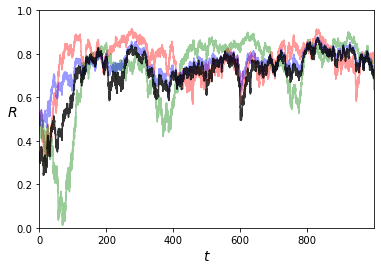

In [9]:
# plot the community order parameters and the network order parameter
t=arange(steps)*dt
plot(t,np.abs(Z0hist),'r',alpha=0.4)
plot(t,np.abs(Z1hist),'g',alpha=0.4)
plot(t,np.abs(Z2hist),'b',alpha=0.4)
plot(t,np.abs(Z0hist+Z1hist+Z2hist)/3,'k',alpha=0.8)
ylim(0,1)
xlim(t[0],t[-1])
xlabel('$t$',fontsize=14)
ylabel('$R$',fontsize=14,rotation=0)
show()

In [10]:
import numpy as np

def GetYourSoxOn(f,h,D) :
    """Define the constants s=-i f^*/|f|, o=1-ih/D and x=D/|f| from
    the Adler equation \dot \varphi = iz(f^*z + h + \sqrt{2D}\eta + fz^*)"""
    tiny=1e-30
    f=np.array(f)
    f[np.abs(f)==0]=tiny
    s = -1.0j*f.conj()/np.abs(f)
    o = 1.0-1.0j*h/D
    x = D/np.abs(f)
    return s,o,x


def MrKnox(s,o,k,x) :
    """Calculate the continued fraction p_k/p_{k-1} 
    = 1/(s o_k x) 1 / (o_k + x^{-2}/((o_k+1) + x^{-2}/((o_k+2) + x^{-2}/...)))
    
    standard continued fraction algorithm
    """
    tiny=1e-30
    eps=1e-10
    o=o+k-1
    o = np.array(o)
    scalar = o.shape==()
    if scalar : o.shape=1 # all variables need to be arrays for propper indexing
    fnow=np.array(o)
    fnow[fnow==0]=tiny
    Cnow=fnow
    Dnow=0.0;
    x = np.array(x)
    x[x==0]=tiny
    z=1.0/(x*x)    
    j=1
    while True :
        Dnow=o+j+z*Dnow;
        Dnow[Dnow==0]=tiny;
        Cnow = o+j+z/Cnow;
        Cnow[Cnow==0]=tiny;
        Dnow=1./Dnow
        Deltanow=Cnow*Dnow
        fnow=fnow*Deltanow
        maxerr=np.max(np.abs(Deltanow-1))
        if maxerr<eps :
            f = 1.0/fnow
            break
        j=j+1
    if scalar : return (f/(s*x))[0] # return scalar
    else : return f/(s*x)           # return array

Calculation of curves with $\dot R=0$ :

In [40]:
R = np.linspace(0.001,0.99,200)
q = np.linspace(0.01,10,200)
q,R = meshgrid(q,R)
lam = 0.5
w = 1.0
beta = 10
D = q*beta
alpha=-0.1

In [41]:
f = beta*exp(-1j*alpha)*lam/(2j)*R
h = beta*w

In [42]:
s,o,x = GetYourSoxOn(f,h,D)
G = MrKnox(s,o,1,x)

In [43]:
sgm = (exp(-1j*alpha)*lam/(2)*G).real*(1-R**2)/R

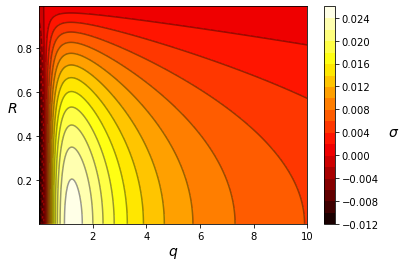

In [50]:
contourf(q,R,sgm,levels=20,cmap='hot')
colorbar()
contour(q,R,sgm,levels=20,colors='k',alpha=0.4)
xlabel('$q$',fontsize=14)
ylabel('$R$',fontsize=14,rotation=0)
text(13,0.4,r'$\sigma$',rotation=0,fontsize=14)
show()

In [34]:
def G(Z1,Z2,N1,N2,q,ohm,lam,alpha) :
    """time averaged influencer field (coupling function in hypergraph)
    with two follower groups of mean fields Z1 and Z2, and sizes N1 and N2
    effective noise strangth q, coupling strength Lambda and 
    phase frustration alpha in the influencer
    """

    # force on influecner
    f = exp(-1j*alpha)*lam/(2j)*(N1/(N1+N2)*Z1 + N2/(N1+N2)*Z2)
    
    s = np.abs(f)/(1j*f)
    o = 1 - 1j*ohm/q
    x = q/np.abs(f)
    
    p1 = MrKnox(s,o,1,x)
    return p1


def ThreePartsODE(Z0,Z1,Z2,N0,N1,N2,qA,qB,ohm,lam,alpha,sgm) :
    """
    ODE time derivatives for the complex follower mean fields Z0, Z1 and Z2
    with group sizes N0, N1 and N2, effective noise qA and qB in the influencers,
    frequencies ohm in the followers and frequency heterogeneity sgm,
    coupling strength lambda, phase frustration alpha
    """
    f0 = exp(-1j*alpha)*lam/(2j)*G(Z0,Z2,N0,N2,qA,ohm,lam,alpha)
    f1 = exp(-1j*alpha)*lam/(2j)*G(Z1,Z2,N1,N2,qB,ohm,lam,alpha)
    f2 = (f0+f1)/2
    
    h = ohm+1j*sgm
    
    dZ0 = 1j*(f0.conj()*Z0**2 + h *Z0 + f0)
    dZ1 = 1j*(f1.conj()*Z1**2 + h *Z1 + f1)
    dZ2 = 1j*(f2.conj()*Z2**2 + h *Z2 + f2)
    
    return dZ0,dZ1,dZ2

In [35]:
Z0 = np.random.random()*exp(1j*np.random.random()*2*pi)
Z1 = np.random.random()*exp(1j*np.random.random()*2*pi)
Z2 = np.random.random()*exp(1j*np.random.random()*2*pi)

In [36]:
lam=0.5
qA=1.5
qB=1.5
w0=1.0
alpha=-0.1
sgm=0.01

N0=200
N1=200
N2=200

In [37]:
# run simulation of follower mean fields under the influence of
# averaged fast influencer fields for a time dt*steps

dt = 0.001
steps = 1000000
t=0.0

R0hist=np.zeros(steps)
R1hist=np.zeros(steps)
R2hist=np.zeros(steps)

Rhist=np.zeros(steps)

pctlast=-1
for t in range(steps) :
    
    pct = (t*100//steps)
    if pct!=pctlast :
        print(pct,end=' ')
        pctlast=pct

    
    R0hist[t] = np.abs(Z0)
    R1hist[t] = np.abs(Z1)
    R2hist[t] = np.abs(Z2)
    Rhist[t] = np.abs((N0*Z0+N1*Z1+N2*Z2)/(N0+N1+N2))
    
    dZ0,dZ1,dZ2 = ThreePartsODE(Z0,Z1,Z2,N0,N1,N2,qA,qB,w0,lam,alpha,sgm)
    
    Z0 += dt*dZ0
    Z1 += dt*dZ1
    Z2 += dt*dZ2
    
print('\n.done.')

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 

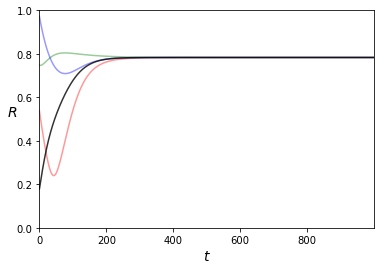

In [51]:
t=arange(steps)*dt
plot(t,R0hist,'r',alpha=0.4)
plot(t,R1hist,'g',alpha=0.4)
plot(t,R2hist,'b',alpha=0.4)
plot(t,Rhist,'k',alpha=0.8)
ylim(0,1)
xlim(t[0],t[-1])
xlabel('$t$',fontsize=14)
ylabel('$R$',fontsize=14,rotation=0)

show()